In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
!pip install imbalanced-learn


In [ ]:
data = pd.read_csv("/content/creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
print(data.head(10))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [ ]:
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
print("Number of Duplicate Rows:", data.duplicated().sum())


Number of Duplicate Rows: 1081


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
print("\nAfter removing duplicates:")
print(data.info ())


After removing duplicates:
<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  

In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
logistic_classifier_orig = LogisticRegression()
logistic_classifier_orig.fit(X_train, y_train)
y_pred_orig = logistic_classifier_orig.predict(X_test)

In [ ]:
print("Performance on Original Unbalanced Dataset:")
print("Accuracy:", accuracy_score(y_test, y_pred_orig))
print(classification_report(y_test, y_pred_orig))

Performance on Original Unbalanced Dataset:
Accuracy: 0.9991541254009093
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.53      0.67        90

    accuracy                           1.00     56746
   macro avg       0.94      0.77      0.83     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
print("Class Distribution before Balancing:")
print(y.value_counts())


Class Distribution before Balancing:
Class
0    283253
1       473
Name: count, dtype: int64


SMOTE balancing


In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print("Class Distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Class Distribution after SMOTE:
Class
0    226597
1    226597
Name: count, dtype: int64


Random Over Sampling

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

In [ ]:
print("\nClass Distribution after Oversampling:")
print(pd.Series(y_train_over).value_counts())



Class Distribution after Oversampling:
Class
0    226597
1    226597
Name: count, dtype: int64


Random Under Sampling

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

In [ ]:
print("\nClass Distribution after Undersampling:")
print(pd.Series(y_train_under).value_counts())


Class Distribution after Undersampling:
Class
0    383
1    383
Name: count, dtype: int64


Logistic Regression for Unbalanced Dataset

In [ ]:
print("Performance on Original Unbalanced Dataset:")
print("Accuracy:", accuracy_score(y_test, y_pred_orig))
print(classification_report(y_test, y_pred_orig))

Performance on Original Unbalanced Dataset:
Accuracy: 0.9991541254009093
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.53      0.67        90

    accuracy                           1.00     56746
   macro avg       0.94      0.77      0.83     56746
weighted avg       1.00      1.00      1.00     56746



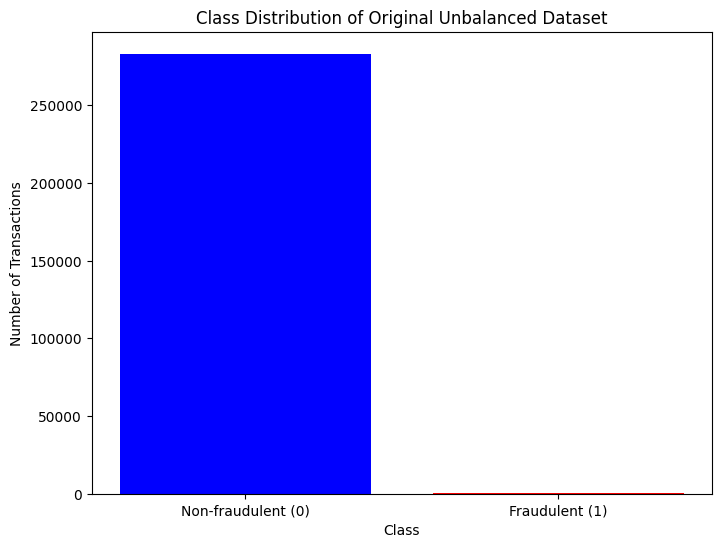

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(['Non-fraudulent (0)', 'Fraudulent (1)'], data['Class'].value_counts(), color=['blue', 'red'])
plt.title('Class Distribution of Original Unbalanced Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.show()


Logistic Regression for Balanced Dataset SMOTE

In [ ]:
logistic_classifier_smote = LogisticRegression()
logistic_classifier_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = logistic_classifier_smote.predict(X_test)

In [ ]:
print("\nPerformance on Balanced Datasets:")
print("Accuracy (SMOTE):", accuracy_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))


Performance on Balanced Datasets:
Accuracy (SMOTE): 0.9749585873894195
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.05      0.89      0.10        90

    accuracy                           0.97     56746
   macro avg       0.53      0.93      0.54     56746
weighted avg       1.00      0.97      0.99     56746



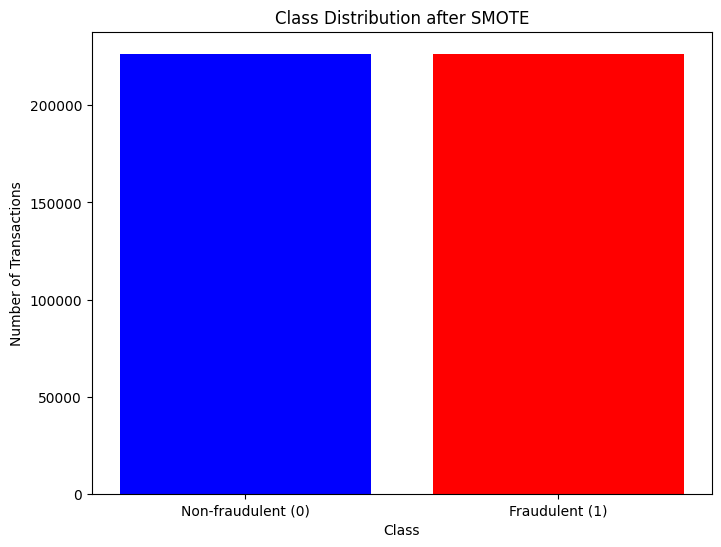

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(['Non-fraudulent (0)', 'Fraudulent (1)'], np.bincount(y_train_smote), color=['blue', 'red'])
plt.title('Class Distribution after SMOTE')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.show()

Logistic Regression for Balanced Dataset Oversampling

In [ ]:
logistic_classifier_over = LogisticRegression()
logistic_classifier_over.fit(X_train_over, y_train_over)
y_pred_over = logistic_classifier_over.predict(X_test)

In [ ]:
print("Accuracy (Random Oversampling):", accuracy_score(y_test, y_pred_over))
print(classification_report(y_test, y_pred_over))

Accuracy (Random Oversampling): 0.9776900574489832
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.06      0.89      0.11        90

    accuracy                           0.98     56746
   macro avg       0.53      0.93      0.55     56746
weighted avg       1.00      0.98      0.99     56746



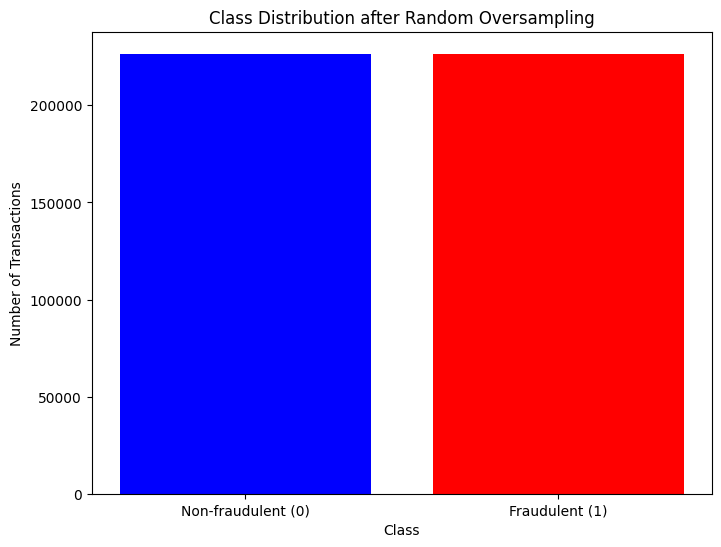

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(['Non-fraudulent (0)', 'Fraudulent (1)'], np.bincount(y_train_over), color=['blue', 'red'])
plt.title('Class Distribution after Random Oversampling')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.show()


Logistic Regression for Balanced Dataset Undersampling

In [ ]:
logistic_classifier_under = LogisticRegression()
logistic_classifier_under.fit(X_train_under, y_train_under)
y_pred_under = logistic_classifier_under.predict(X_test)

In [ ]:
print("Accuracy (Random Undersampling):", accuracy_score(y_test, y_pred_under))
print(classification_report(y_test, y_pred_under))

Accuracy (Random Undersampling): 0.9613541042540443
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56656
           1       0.04      0.90      0.07        90

    accuracy                           0.96     56746
   macro avg       0.52      0.93      0.52     56746
weighted avg       1.00      0.96      0.98     56746



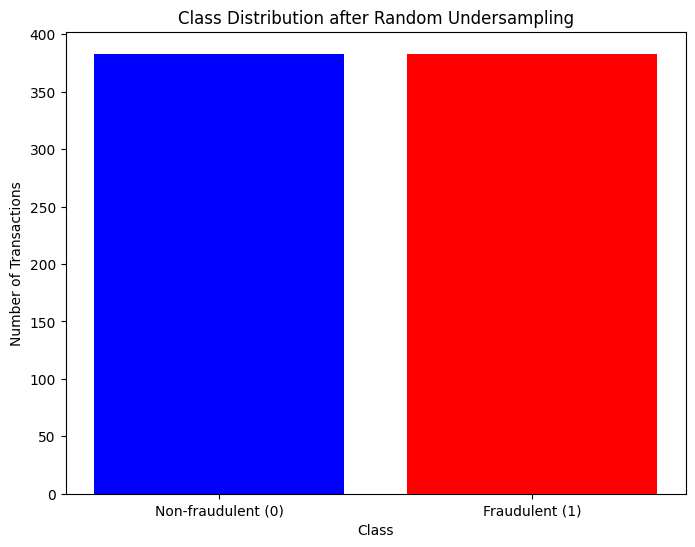

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(['Non-fraudulent (0)', 'Fraudulent (1)'], np.bincount(y_train_under), color=['blue', 'red'])
plt.title('Class Distribution after Random Undersampling')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.show()